In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import pandas as pd

In [2]:
Ticker = "TSLA"
start_date = dt.date(2010,1,1)
interval = "1d"
data = yf.download(tickers=Ticker,start= start_date,interval= interval)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3931 entries, 2010-06-29 to 2026-02-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3931 non-null   float64
 1   (High, TSLA)    3931 non-null   float64
 2   (Low, TSLA)     3931 non-null   float64
 3   (Open, TSLA)    3931 non-null   float64
 4   (Volume, TSLA)  3931 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 184.3 KB


In [4]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,3931.000000,3931.000000,3931.000000,3931.000000,3.931000e+03
mean,101.616902,103.854965,99.289117,101.647664,9.649683e+07
std,128.034319,130.868471,125.141304,128.136902,7.548573e+07
min,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,12.869000,13.046334,12.607334,12.827333,5.154750e+07
50%,20.066000,20.426666,19.677999,20.049334,8.283900e+07
75%,210.906662,216.196671,206.193336,210.369995,1.207222e+08
max,489.880005,498.829987,485.329987,489.880005,9.140820e+08


In [5]:
val = data["Close"].squeeze()
ret = val.pct_change()

df = pd.DataFrame({"Close":val,"return":ret}, index=data.index).dropna()
df.index = pd.to_datetime(df.index)
df

,Close,return
Date,,
2010-06-30,1.588667,-0.002511
2010-07-01,1.464000,-0.078473
2010-07-02,1.280000,-0.125683
2010-07-06,1.074000,-0.160937
2010-07-07,1.053333,-0.019243
...,...,...
2026-02-06,411.109985,0.034994
2026-02-09,417.320007,0.015106
2026-02-10,425.209991,0.018906


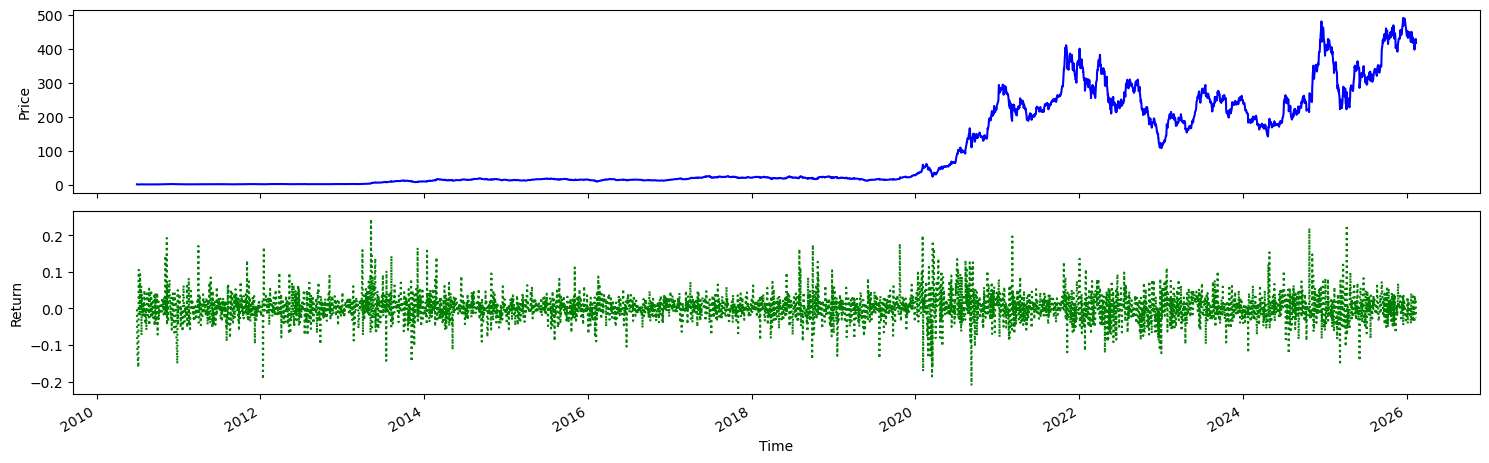

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize = (15,5),sharex=True)

ax[0].plot(df.index,df.Close, linestyle = "-", color = "blue")
ax[0].set_ylabel("Price")

ax[1].plot(df.index,df["return"], linestyle = ":", color = "green")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Return")

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

In [7]:
split = int(len(df) * 0.8)
split

3144

In [8]:
train = df.iloc[:split]
test = df.iloc[split:]

In [9]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# Prediction using historical mean

In [10]:
hist_mean = np.mean(train.loc[:,"Close"].values)
test.loc[:,"Hist_mean_pred"] = hist_mean
print(f"Historical mean value is: {round(hist_mean,2)}")

Historical mean value is: 58.73


C:\Users\danie\AppData\Local\Temp\ipykernel_3244\2885677826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"Hist_mean_pred"] = hist_mean


In [11]:
hist_mean_mape = MAPE(test.loc[:,"Close"], test.loc[:,"Hist_mean_pred"])
print(f"Mape: {round(hist_mean_mape,2)}%")

Mape: 75.99%


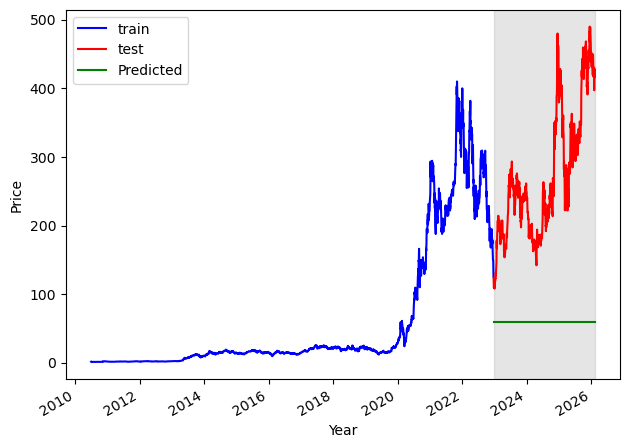

In [12]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["Hist_mean_pred"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Prediction using last year mean

In [13]:
df_2025 = df.loc["2025"]
df_2025

,Close,return
Date,,
2025-01-02,379.279999,-0.060816
2025-01-03,410.440002,0.082156
2025-01-06,411.049988,0.001486
2025-01-07,394.359985,-0.040603
2025-01-08,394.940002,0.001471
...,...,...
2025-12-24,485.399994,-0.000330
2025-12-26,475.190002,-0.021034
2025-12-29,459.640015,-0.032724


In [14]:
last_year_mean = np.mean(df_2025.values)
test.loc[:,"last_year_mean_pred"] = last_year_mean
print(f"Last year mean {round(last_year_mean,2)}")

Last year mean 178.49


C:\Users\danie\AppData\Local\Temp\ipykernel_3244\4000410074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"last_year_mean_pred"] = last_year_mean


In [15]:
last_year_mean_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_year_mean_pred"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 30.69%


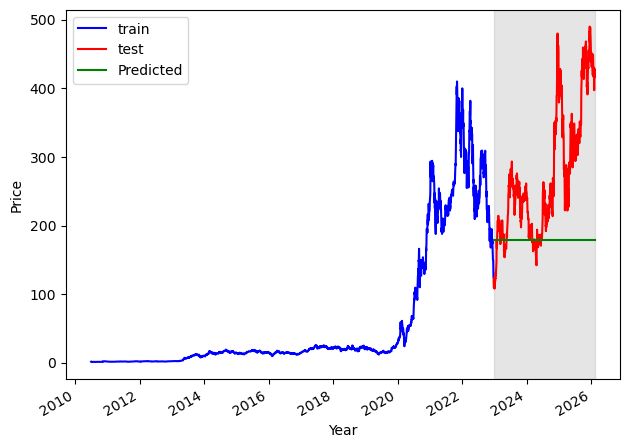

In [16]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_year_mean_pred"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Prediction using last known value

In [17]:
last_know_value = train["Close"].iloc[-1]
print(f"Last known value is: {last_know_value}")
test.loc[:,"last_known_value"] = last_know_value

Last known value is: 125.3499984741211


C:\Users\danie\AppData\Local\Temp\ipykernel_3244\2169454477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"last_known_value"] = last_know_value


In [18]:
last_year_known_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_known_value"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 30.69%


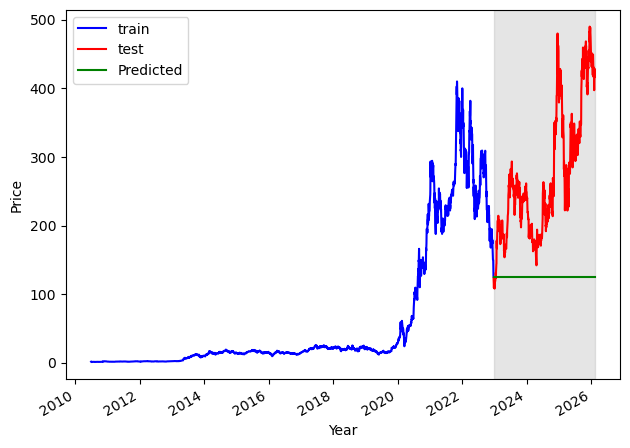

In [19]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_known_value"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Naive Seasonal Forecast

In [20]:
period = 5   # weekly trading cycle (Mon–Fri)
last_season_value = train["Close"].iloc[-period:].values
last_season_value


array([150.22999573, 149.86999512, 137.80000305, 137.57000732,
       125.34999847])

In [21]:
test["last_season_value"] = np.tile(last_season_value,len(test))[:len(test)]

C:\Users\danie\AppData\Local\Temp\ipykernel_3244\746138775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["last_season_value"] = np.tile(last_season_value,len(test))[:len(test)]


In [22]:
naive_season_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_season_value"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 30.69%


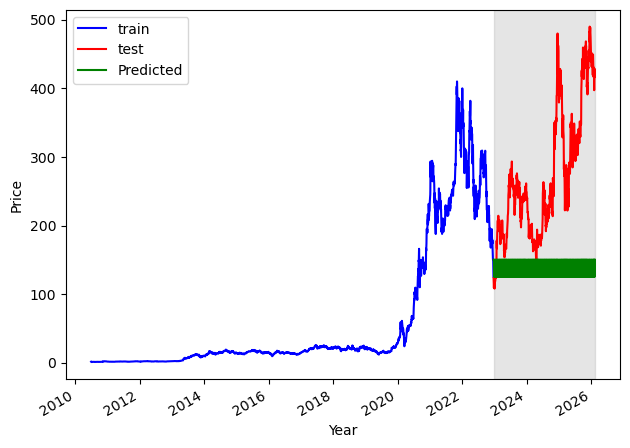

In [23]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_season_value"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Summary

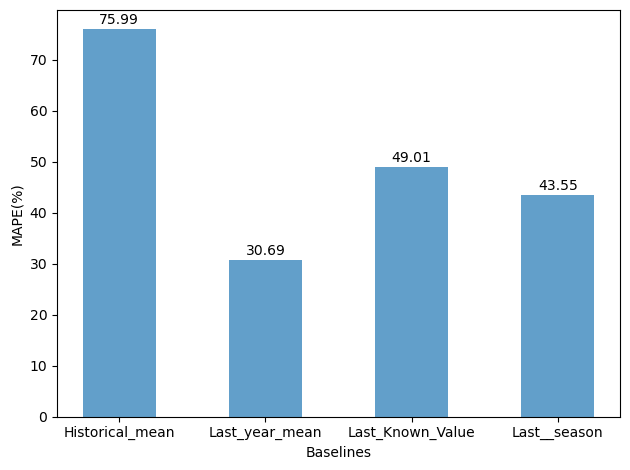

In [24]:
fig, ax = plt.subplots()

x = ["Historical_mean","Last_year_mean","Last_Known_Value","Last__season"]
y = [hist_mean_mape,last_year_mean_mape,last_year_known_mape,naive_season_mape]

ax.bar(x,y,width = 0.5, alpha = 0.7)
ax.set_xlabel("Baselines")
ax.set_ylabel("MAPE(%)")

for index,value in enumerate(y):
    plt.text(x = index, y = value+1, s = str(round(value,2)),ha = "center")

plt.tight_layout()

plt.show()